<a href="https://colab.research.google.com/github/jeevitha-14082004/AI-ML-Projects/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0090
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.4624e-04
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.5660e-04
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.7544e-04
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.4528e-04
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


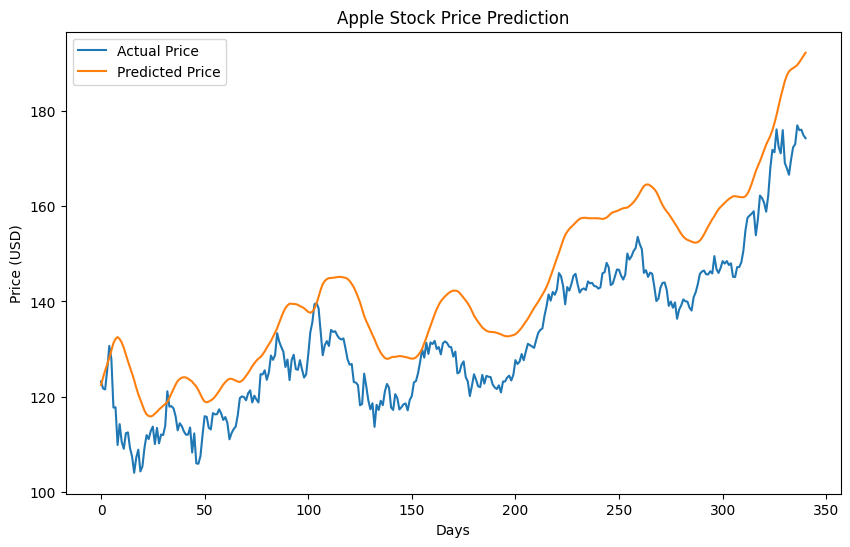

In [1]:
# Step 1: Install necessary libraries (only once)
!pip install -q yfinance

# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 3: Load stock data
df = yf.download('AAPL', start='2015-01-01', end='2022-01-01')
df = df[['Close']]
df.head()

# Step 4: Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Create sequences
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Step 6: Split into train/test
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 7: Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 8: Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Step 9: Predict and visualize
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Step 10: Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.title("Apple Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
